In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2016-01-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2016-01-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  17760   Î∂ÄÏÇ∞ÏßÑÍµ¨  17760   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2016-01-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5744   Î∂ÄÏÇ∞ÏßÑÍµ¨   5744   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2016-01-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4900   Î∂ÄÏÇ∞ÏßÑÍµ¨   4900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2016-01-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2016-01-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9800   Î∂ÄÏÇ∞ÏßÑÍµ¨   9800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2016-01-07     ÎåÄÌåå                      1.0„éè   4688   Î∂ÄÏÇ∞ÏßÑÍµ¨   4688   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2016-01-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2016-01-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2016-01-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    630   Î∂ÄÏÇ∞ÏßÑÍµ¨    630   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2016-01-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240   Î∂ÄÏÇ∞ÏßÑÍµ¨   1240   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2016-01-07      Î¨¥                   2.0„éè 1Í∞ú   1546   Î∂ÄÏÇ∞ÏßÑÍµ¨   1546   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2016-01-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430   Î∂ÄÏÇ∞ÏßÑÍµ¨   3430   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2016-01-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2100   Î∂ÄÏÇ∞ÏßÑÍµ¨   2100   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2016-01-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  15778   Î∂ÄÏÇ∞ÏßÑÍµ¨  15778   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2016-01-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1780   Î∂ÄÏÇ∞ÏßÑÍµ¨   1780   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2016-01-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6500   Î∂ÄÏÇ∞ÏßÑÍµ¨   6500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2016-01-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2016-01-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   9373   Î∂ÄÏÇ∞ÏßÑÍµ¨   9373   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2016-01-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2016-01-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630   Î∂ÄÏÇ∞ÏßÑÍµ¨   1630   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2016-01-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1120   Î∂ÄÏÇ∞ÏßÑÍµ¨   1120   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2016-01-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  34500   Î∂ÄÏÇ∞ÏßÑÍµ¨  34500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2016-01-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2016-01-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44800   Î∂ÄÏÇ∞ÏßÑÍµ¨  44800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2016-01-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2728   Î∂ÄÏÇ∞ÏßÑÍµ¨   2728   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2016-01-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Î∂ÄÏÇ∞ÏßÑÍµ¨    730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2016-01-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600   Î∂ÄÏÇ∞ÏßÑÍµ¨   6600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2016-01-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2016-01-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2780   Î∂ÄÏÇ∞ÏßÑÍµ¨   2780   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2016-01-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11900   Î∂ÄÏÇ∞ÏßÑÍµ¨  11900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%  17,760  
1      0    0.0%   5,744  
2      0    0.0%   4,900  
3      0    0.0%   2,580  
4      0    0.0%   9,800  
5      0    0.0%   4,688  
6      0    0.0%  13,500  
7      0    0.0%   4,365  
8      0    0.0%     630  
9      0    0.0%   1,240  
10     0    0.0%   1,546  
11     0    0.0%   3,430  
12     0    0.0%   2,100  
13     0    0.0%  15,778  
14     0    0.0%   1,780  
15     0    0.0%   6,500  
16     0    0.0%  13,900  
17     0    0.0%   9,373 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2016-04-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2016-04-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  17760   Î∂ÄÏÇ∞ÏßÑÍµ¨  17760   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2016-04-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5744   Î∂ÄÏÇ∞ÏßÑÍµ¨   5744   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2016-04-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   6237   Î∂ÄÏÇ∞ÏßÑÍµ¨   6237   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2016-04-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2016-04-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè  12900   Î∂ÄÏÇ∞ÏßÑÍµ¨  12900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2016-04-07     ÎåÄÌåå                      1.0„éè   5227   Î∂ÄÏÇ∞ÏßÑÍµ¨   5227   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2016-04-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12950   Î∂ÄÏÇ∞ÏßÑÍµ¨  12950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2016-04-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2016-04-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    630   Î∂ÄÏÇ∞ÏßÑÍµ¨    630   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2016-04-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240   Î∂ÄÏÇ∞ÏßÑÍµ¨   1240   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2016-04-07      Î¨¥                   2.0„éè 1Í∞ú   2386   Î∂ÄÏÇ∞ÏßÑÍµ¨   2386   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2016-04-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430   Î∂ÄÏÇ∞ÏßÑÍµ¨   3430   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2016-04-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú  10000   Î∂ÄÏÇ∞ÏßÑÍµ¨  10000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2016-04-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  37343   Î∂ÄÏÇ∞ÏßÑÍµ¨  37343   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2016-04-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3835   Î∂ÄÏÇ∞ÏßÑÍµ¨   3835   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2016-04-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6500   Î∂ÄÏÇ∞ÏßÑÍµ¨   6500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2016-04-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14900   Î∂ÄÏÇ∞ÏßÑÍµ¨  14900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2016-04-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13069   Î∂ÄÏÇ∞ÏßÑÍµ¨  13069   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2016-04-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2016-04-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1590   Î∂ÄÏÇ∞ÏßÑÍµ¨   1590   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2016-04-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1120   Î∂ÄÏÇ∞ÏßÑÍµ¨   1120   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2016-04-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49950   Î∂ÄÏÇ∞ÏßÑÍµ¨  49950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2016-04-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2016-04-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39900   Î∂ÄÏÇ∞ÏßÑÍµ¨  39900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2016-04-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3037   Î∂ÄÏÇ∞ÏßÑÍµ¨   3037   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2016-04-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Î∂ÄÏÇ∞ÏßÑÍµ¨    730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2016-04-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600   Î∂ÄÏÇ∞ÏßÑÍµ¨   6600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2016-04-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3200   Î∂ÄÏÇ∞ÏßÑÍµ¨   3200   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2016-04-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1879   Î∂ÄÏÇ∞ÏßÑÍµ¨   1879   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2016-04-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   9900   Î∂ÄÏÇ∞ÏßÑÍµ¨   9900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%  17,760  
1      0    0.0%   5,744  
2      0    0.0%   6,237  
3      0    0.0%   2,580  
4      0    0.0%  12,900  
5      0    0.0%   5,227  
6      0    0.0%  12,950  
7      0    0.0%   4,365  
8      0    0.0%     630  
9      0    0.0%   1,240  
10     0    0.0%   2,386  
11     0    0.0%   3,430  
12     0    0.0%  10,000  
13     0    0.0%  37,343  
14     0    0.0%   3,835  
15     0    0.0%   6,500  
16     0    0.0%  14,900  
17     0    0.0%  13,069 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2016-07-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2016-07-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8880   Î∂ÄÏÇ∞ÏßÑÍµ¨   8880   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2016-07-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6061   Î∂ÄÏÇ∞ÏßÑÍµ¨   6061   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2016-07-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3737   Î∂ÄÏÇ∞ÏßÑÍµ¨   3737   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2016-07-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2480   Î∂ÄÏÇ∞ÏßÑÍµ¨   2480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2016-07-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè  14900   Î∂ÄÏÇ∞ÏßÑÍµ¨  14900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2016-07-07     ÎåÄÌåå                      1.0„éè   4198   Î∂ÄÏÇ∞ÏßÑÍµ¨   4198   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2016-07-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  13950   Î∂ÄÏÇ∞ÏßÑÍµ¨  13950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2016-07-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2016-07-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    590   Î∂ÄÏÇ∞ÏßÑÍµ¨    590   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2016-07-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240   Î∂ÄÏÇ∞ÏßÑÍµ¨   1240   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2016-07-07      Î¨¥                   2.0„éè 1Í∞ú   1986   Î∂ÄÏÇ∞ÏßÑÍµ¨   1986   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2016-07-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2016-07-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9080   Î∂ÄÏÇ∞ÏßÑÍµ¨   9080   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2016-07-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  40481   Î∂ÄÏÇ∞ÏßÑÍµ¨  40481   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2016-07-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2390   Î∂ÄÏÇ∞ÏßÑÍµ¨   2390   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2016-07-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   5890   Î∂ÄÏÇ∞ÏßÑÍµ¨   5890   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2016-07-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14300   Î∂ÄÏÇ∞ÏßÑÍµ¨  14300   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2016-07-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15790   Î∂ÄÏÇ∞ÏßÑÍµ¨  15790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2016-07-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2016-07-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2016-07-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1120   Î∂ÄÏÇ∞ÏßÑÍµ¨   1120   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2016-07-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44950   Î∂ÄÏÇ∞ÏßÑÍµ¨  44950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2016-07-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2016-07-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39900   Î∂ÄÏÇ∞ÏßÑÍµ¨  39900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2016-07-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2131   Î∂ÄÏÇ∞ÏßÑÍµ¨   2131   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2016-07-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Î∂ÄÏÇ∞ÏßÑÍµ¨    730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2016-07-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600   Î∂ÄÏÇ∞ÏßÑÍµ¨   6600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2016-07-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2016-07-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2016-07-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15899   Î∂ÄÏÇ∞ÏßÑÍµ¨  15899   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   8,880  
1      0    0.0%   6,061  
2      0    0.0%   3,737  
3      0    0.0%   2,480  
4      0    0.0%  14,900  
5      0    0.0%   4,198  
6      0    0.0%  13,950  
7      0    0.0%   4,365  
8      0    0.0%     590  
9      0    0.0%   1,240  
10     0    0.0%   1,986  
11     0    0.0%   2,980  
12     0    0.0%   9,080  
13     0    0.0%  40,481  
14     0    0.0%   2,390  
15     0    0.0%   5,890  
16     0    0.0%  14,300  
17     0    0.0%  15,790 

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2016-10-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2016-10-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  13425   Î∂ÄÏÇ∞ÏßÑÍµ¨  13425   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2016-10-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6061   Î∂ÄÏÇ∞ÏßÑÍµ¨   6061   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2016-10-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3571   Î∂ÄÏÇ∞ÏßÑÍµ¨   3571   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2016-10-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2016-10-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè  15900   Î∂ÄÏÇ∞ÏßÑÍµ¨  15900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2016-10-13     ÎåÄÌåå                      1.0„éè   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2016-10-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12950   Î∂ÄÏÇ∞ÏßÑÍµ¨  12950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2016-10-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2016-10-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    630   Î∂ÄÏÇ∞ÏßÑÍµ¨    630   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2016-10-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240   Î∂ÄÏÇ∞ÏßÑÍµ¨   1240   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2016-10-13      Î¨¥                   2.0„éè 1Í∞ú   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   4983   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2016-10-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430   Î∂ÄÏÇ∞ÏßÑÍµ¨   3430   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2016-10-13     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   5326   Î∂ÄÏÇ∞ÏßÑÍµ¨   5326   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2016-10-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  28542   Î∂ÄÏÇ∞ÏßÑÍµ¨  28542   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2016-10-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2016-10-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6500   Î∂ÄÏÇ∞ÏßÑÍµ¨   6500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2016-10-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨  13500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2016-10-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15980   Î∂ÄÏÇ∞ÏßÑÍµ¨  15980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2016-10-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2016-10-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   1540   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2016-10-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1130   Î∂ÄÏÇ∞ÏßÑÍµ¨   1130   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2016-10-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  56500   Î∂ÄÏÇ∞ÏßÑÍµ¨  56500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2016-10-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   6950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2016-10-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39900   Î∂ÄÏÇ∞ÏßÑÍµ¨  39900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2016-10-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1210   Î∂ÄÏÇ∞ÏßÑÍµ¨   1210   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2016-10-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Î∂ÄÏÇ∞ÏßÑÍµ¨    730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2016-10-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250   Î∂ÄÏÇ∞ÏßÑÍµ¨   7250   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2016-10-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2016-10-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2016-10-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  16900   Î∂ÄÏÇ∞ÏßÑÍµ¨  16900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%  13,425  
1      0    0.0%   6,061  
2      0    0.0%   3,571  
3      0    0.0%   2,490  
4      0    0.0%  15,900  
5      0    0.0%   4,983  
6      0    0.0%  12,950  
7      0    0.0%   4,365  
8      0    0.0%     630  
9      0    0.0%   1,240  
10     0    0.0%   4,983  
11     0    0.0%   3,430  
12     0    0.0%   5,326  
13     0    0.0%  28,542  
14     0    0.0%   5,990  
15     0    0.0%   6,500  
16     0    0.0%  13,500  
17     0    0.0%  15,980 

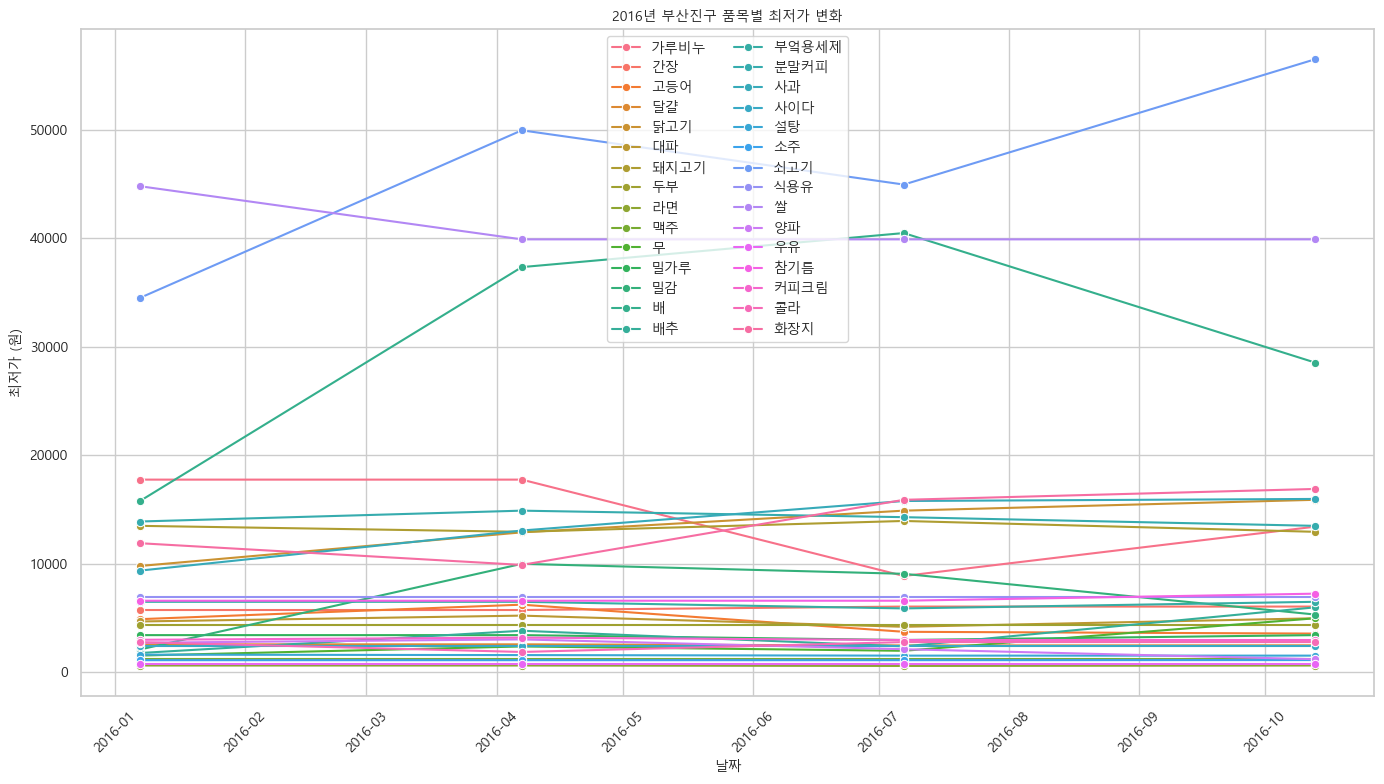

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2016ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_min.csv", index=False, encoding="utf-8-sig")

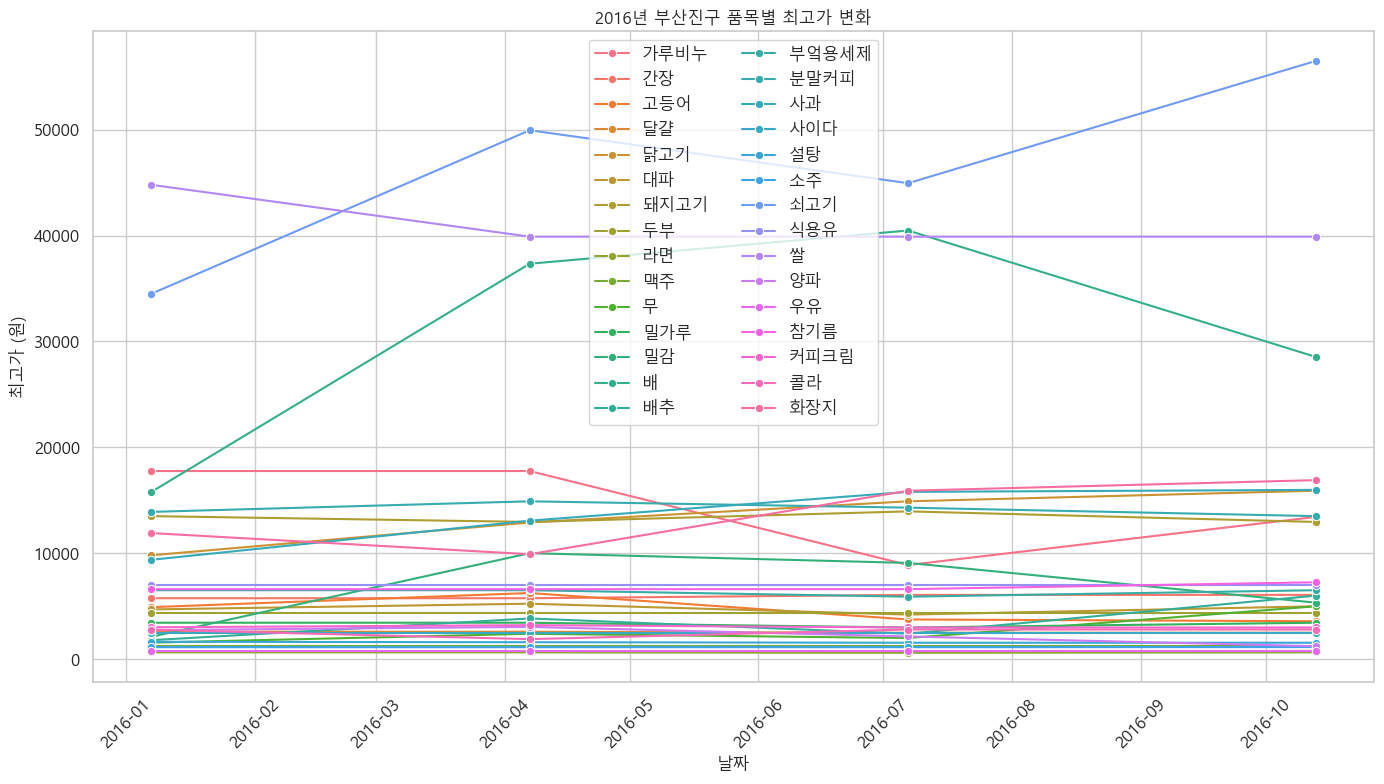

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2016ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2016_max.csv", index=False, encoding="utf-8-sig")